## __LAB - 06__
#### Clustering Methods

#### __Part 1: Data Exploration and Preprocessing__
1. __Loading the data:-__

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_dataset = pd.read_csv('./Mall_Customers.csv')

2. __Explore the Dataset:__
    * Display the first few rows using `.head()`.
    * Get a summary of the data, including data types and non-null values, using `.info()`.
    * Generate descriptive statistics using `.describe()`.

In [3]:
customer_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


3. __Data Selection:__ For this lab, we are only interested in the Annual Income (k$) and Spending Score(1-100) columns. Create a new DataFrame or a NumPy array containing only these two features.

In [6]:
df = customer_dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


4. __Initial Visualization:__ Create a scatter plot of Annual Income vs Spending Score to visualize the distribution of the data points. This will give you an initial intuition about the potential clusters.

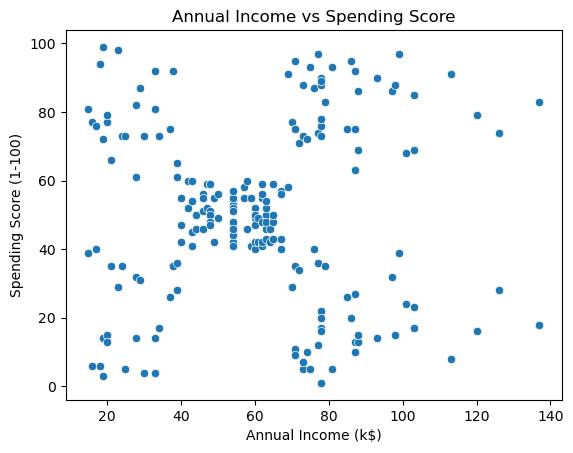

In [7]:
plt.figure()
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title("Annual Income vs Spending Score")
plt.show()

#### __Part 2: K-Means Clustering__
1. __Finding the Optimal Number of Clusters (k):__
    * Use the Elbow Method to determine the optimal value of 'k'.
    * Iterate through a range of k values (e.g. 1 to 10).
    * For each k, fit a KMeans model and calculate the Within-Cluster Sum of Squares (WCSS), which is the inertia_attribute of the fitted model.
    * Plot the WCSS values against the number of clusters(k). The "elbow" point on the graph indicates the optimal k.

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

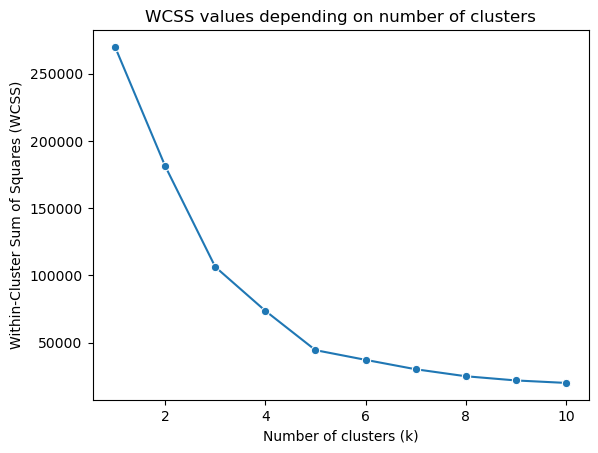

In [8]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure()
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('WCSS values depending on number of clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

2. __Applying K-Means:__
    * Based on the Elbow Method, choose the optimal k.
    * Initialize and fit the KMeans model to your data with the chosen number of clusters.
    * Get the cluster labels for each data point from the labels_attribute.

In [9]:
# as we can see 5 is the optimal number of clusters as the
# slope flattens from that point onwards

optimal_k = 5

# Initializing optimized model
opt_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# model fitting
opt_kmeans.fit(df)

# cluster labels
labels = opt_kmeans.labels_

print(f"Cluster labels: {labels}")

Cluster labels: [4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3. __Visualize K-Means Results:__
    * Create a scatter plot of the data points, coloring each point according to its assignmed cluster label.
    * Plot the centroids of the clusters on the same graph to clearly mark the center of each group.
    * Add a title, axis labels, and a legend to your plot.

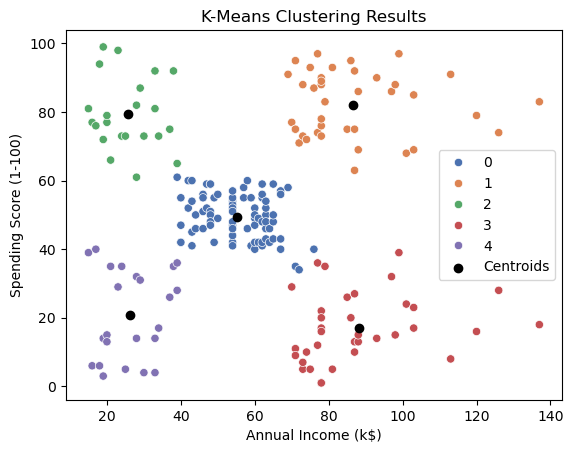

In [12]:
# the centroids of the model
centroids = opt_kmeans.cluster_centers_

plt.figure()
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue=labels,
    palette='deep'
)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='black', marker='o', label='Centroids'
)
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

#### __Part 3: Agglomerative Hierarchical Clustering__
1. __Creating a Dendrogram:__
    * Use the `scipy.cluster.hierarchy` library to generate a dendrogram for your data. A ward linkage method is recommended.
    * Visualize the dendrogram. The y-axis represents the distance between clusters. The optimal number of clusters can be determined by finding the tallest vertical line that doesn't cross any extended horizontal lines and counting the number of vertical lines it intersects.

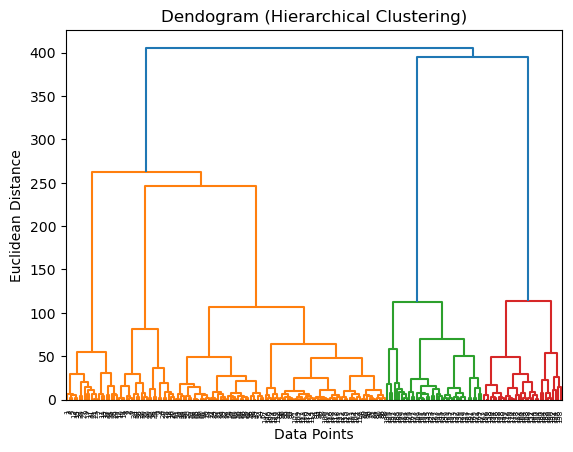

In [13]:
import scipy.cluster.hierarchy as sch

linkage = sch.linkage(df, method='ward')

plt.figure()
dendrogram = sch.dendrogram(linkage)
plt.title("Dendogram (Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

2. __Applying Hierarchical Clustering:__
    * Based on your analysis of the dendrogram, choose the optimal number of clusters.
    * Initialize and fit an AgglomerativeClustering model from scikit-learn with your chosen number of clusters and ward affinity.
    * Get the cluster labels for each data point.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# from the dendrogram, we see that the optimal numbers are 3

# Initialization of model
Hier_clusters = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

# fitting of model and getting labels
Hier_labels = Hier_clusters.fit_predict(df)
print(f"Cluster Labels: {Hier_labels}")

Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


3. __Visualize Hierarchical Clustering Results:__
    * Create a scatter plot similar to the one for K-Means, coloring each data point according to its assigned cluster from the hierarchical model.

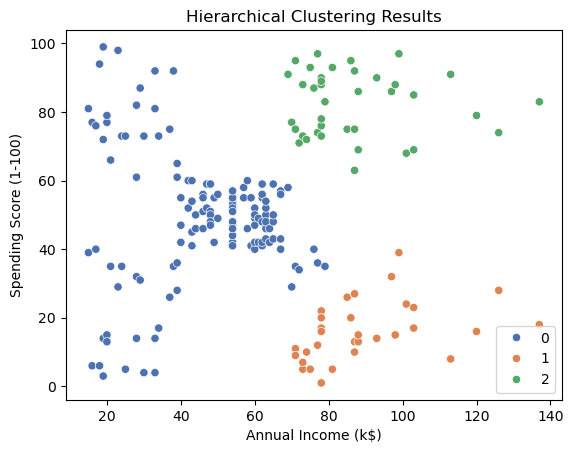

In [16]:
plt.figure()
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue=Hier_labels,
    palette='deep',
    legend='full'
)
plt.title("Hierarchical Clustering Results")
plt.show()

#### __Part 4: DBSCAN Clustering__
1. __Applying DBSCAN:__
    * DBSCAN does not require you to specify the number of clusters beforehand. Instead, it requires two parameters:-
        * eps: the maximum distance between two samples for one to be considered as in the neighbourhood of the other.
        * min_samples: the number of samples in a neighborhood for a point to be considered as a core point.
    * Experiment with different values for eps and min_samples. A good starting point for this dataset could be eps=5 and min_samples=5.
    * Initialize and fit the DBSCAN model to your data.
    * Get the cluster labels. Note that DBSCAN will label noise points as -1.

In [17]:
from sklearn.cluster import DBSCAN

# doing first DBSCAN model using the recommended parameters
db_model = DBSCAN(eps=5, min_samples=5)

db_model.fit(df)

db_labels=db_model.labels_

print(f"All label points: {db_labels}")

All label points: [-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  2 -1  4  3  2  3  2 -1  2  3  4  3  2  3  2  3  4 -1  4
  3  4 -1  2 -1  4 -1  4 -1  2 -1  4  3  2  3  2 -1  4 -1  4 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [24]:
# Changing color of noise to black
num_clusters = set(db_labels)
palette = sns.color_palette('deep', n_colors=len(num_clusters))
dict_palette = dict(zip(num_clusters, palette))

dict_palette[-1] = 'black'

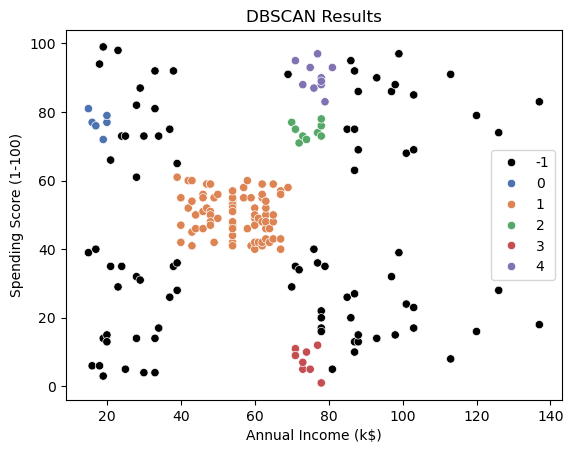

In [25]:
plt.figure()
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue=db_labels,
    palette=dict_palette,
    legend='full'
)
plt.title('DBSCAN Results')
plt.show()


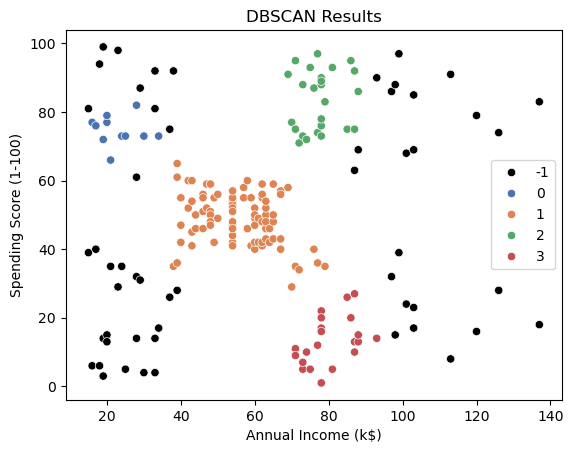

In [47]:
# Experimenting
db_model = DBSCAN(eps=10, min_samples=10)

db_model.fit(df)

db_labels=db_model.labels_

plt.figure()
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue=db_labels,
    palette=dict_palette,
    legend='full'
)
plt.title('DBSCAN Results')
plt.show()


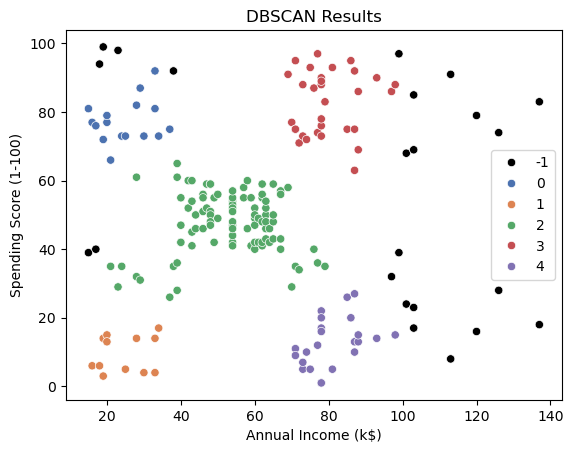

In [48]:
# Experimenting
db_model = DBSCAN(eps=12, min_samples=9)

db_model.fit(df)

db_labels=db_model.labels_

plt.figure()
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue=db_labels,
    palette=dict_palette,
    legend='full'
)
plt.title('DBSCAN Results')
plt.show()


#### __Part 5: Analysis and Questions__
1. __Optimal Clusters:__<br>
    What was the optimal number of clusters you identified for K-Means and Hierarchical Clustering? Justify your choices using the Elbow Method Plot and the Dendrogram.<br><br>
    * __For K-Means:__ The optimal number of clusters came out to be 5 as we see a sudden change in slope (was decreasing a lot and flattened right after) at 5.
    * __For Hierarchical Clustering:__  The largest vertical distance without any horizontal line crossing is between about 250 and 400 on the y-axis. If you draw a horizontal line around y = 300, it will intersect 3 vertical lines. And hence the optimal amount of clusters came out to be 3.
2. __Cluster Comparison:__<br>
    Visually compare the results of the three algorithms. Did they produce similar clusters? Describe any notable differences.<br><br>
    * __